Tugas 1 Visi Komputer <br>
1908107010030<br>
Choirunisa Romadoni <br>
Membuat Filter Telinga dan Kumis Kucing 


In [ ]:
#Tugasnya
#Silakan anda bereksperimen dengan bagian persegi yang dipilih pada video live stream dari camera
#Jika pada contoh bagian persegi diubah menjadi negatif,
#maka pada tugas ini, anda bisa berkreasi, seperti mengubah warna, apply filter seperti blur,
#gaussianblur, medianblur, atau menampilkan efek lainnya
#atau anda bisa berkreasi pada keseluruhan gambar dengan menambah facemask, kumis, 
#telinga kucing atau lainnya

In [1]:
#Code untuk filter telinga dan kumis kucing

import cv2
import numpy as np 

#Pengklasifikasi untuk wajah
face_cascade = cv2.CascadeClassifier('./cascades/haarcascade_frontalface_alt.xml')

#membaca gambar untuk filter
#gambar dapat didownload di github
ears = cv2.imread('gambar/ear.png')
nose = cv2.imread("gambar/nose_cat.png" , -1)

def transparentOverlay(src, overlay , pos = (0,0)  , scale = 1):
    overlay = cv2.resize(overlay , (0,0) ,fx = scale , fy = scale)
    h , w , _ =  overlay.shape ## Ukuran latar depan gambar
    rows , cols , _ = src.shape  ##Ukuran latar belakang gambar
    y , x = pos[0] , pos [1]

    for i in range(h):
        for j in range(w):
            if x + i > rows or y + j >=cols:
                continue
            alpha = float(overlay[i][j][3]/255) ##  read the alpha chanel
            src[x+i][y+j] = alpha * overlay[i][j][:3] + (1-alpha) * src[x+i][y+j]
    return src

#mendapatkan shape dari ears
original_ears_h,original_ears_w,ears_channels = ears.shape

#konversi ke gray
ears_gray = cv2.cvtColor(ears, cv2.COLOR_BGR2GRAY)

#create mask and inverse mask of ears
ret, original_mask = cv2.threshold(ears_gray, 10, 255, cv2.THRESH_BINARY_INV)
original_mask_inv = cv2.bitwise_not(original_mask)

#baca video dari kamera
cap = cv2.VideoCapture(0)
ret, img = cap.read()
img_h, img_w = img.shape[:2]

#looping run sampai user break 
while True:   
    
    #baca setiap frame dan konversi ke gray
    ret, img = cap.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    #deteksi wajah menggunakan classifier
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        
        #koordinat wajah
        face_w = w
        face_h = h
        face_x1 = x
        face_x2 = face_x1 + face_w
        face_y1 = y
        face_y2 = face_y1 + face_h
        
        #koordinat lokasi untuk kumis
        nose_symin = int(y + 2 * h / 6)
        nose_symax = int(y + 6 * h / 6)
        sh_nose = nose_symax - nose_symin
        nose_glass_ori = img[nose_symin:nose_symax, x:x + w]
        nose = cv2.resize(nose, (w, sh_nose), interpolation=cv2.INTER_CUBIC)
        transparentOverlay(nose_glass_ori , nose)
        
        #ukuran telinga pada wajah dengan scaling
        ears_width = int(1.5 * face_w)
        ears_height = int(ears_width * original_ears_h / original_ears_w)
        
        #menentukan koordinat lokasi untuk telinga  
        ears_x1 = face_x2 - int(face_w/2) - int(ears_width/2)
        ears_x2 = ears_x1 + ears_width
        ears_y1 = face_y1 - int(face_h*1.25)
        ears_y2 = ears_y1 + ears_height 

        #check to see if out of frame
        if ears_x1 < 0:
            ears_x1 = 0
        if ears_y1 < 0:
            ears_y1 = 0
        if ears_x2 > img_w:
            ears_x2 = img_w
        if ears_y2 > img_h:
            ears_y2 = img_h

        #Account for any out of frame changes
        ears_width = ears_x2 - ears_x1
        ears_height = ears_y2 - ears_y1

        #resize ears agar cocok pada wajah
        ears = cv2.resize(ears, (ears_width,ears_height), interpolation = cv2.INTER_AREA)
        mask = cv2.resize(original_mask, (ears_width,ears_height), interpolation = cv2.INTER_AREA)
        mask_inv = cv2.resize(original_mask_inv, (ears_width,ears_height), interpolation = cv2.INTER_AREA)

        #take ROI for ears from background that is equal to size of ear image
        roi = img[ears_y1:ears_y2, ears_x1:ears_x2]

        #original image in background (bg) where ears is not
        roi_bg = cv2.bitwise_and(roi,roi,mask = mask)
        roi_fg = cv2.bitwise_and(ears,ears,mask=mask_inv)
        dst = cv2.add(roi_bg,roi_fg)

        #mengembalikan ke original image
        img[ears_y1:ears_y2, ears_x1:ears_x2] = dst

        break
        
    #display image dan capture image
    cv2.imshow("Capturing", img)
    key = cv2.waitKey(1)
    
    #klik 's' untuk menangkap dan menyimpan gambar serta break
    if key == ord('s'): 
        cv2.imwrite(filename='hasilFilter.jpg', img=img)
        cv2.waitKey(1650)
    
    #klik 'q' untuk break
    elif key == ord('q'): 
        break;

cap.release() #turn off camera 
cv2.destroyAllWindows() #close all windows

Text(0.5, 1.0, 'Hasil Gambar Dengan Filter')

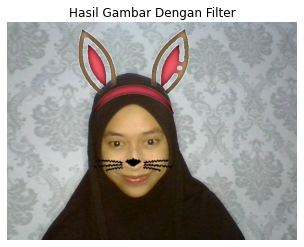

In [2]:
#Menampilkan hasil tangkap layar gambar dengan filter 

import cv2
from matplotlib import pyplot as plt

im = cv2.imread("hasilFilter.jpg", cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Hasil Gambar Dengan Filter")